# Thông tin bài làm

## Đề tài

Đề tài thực hiện: Xử lý khử nhiễu hình ảnh bằng PCA.

Môn học: Phương pháp số cho Khoa học dữ liệu

Mã môn học: MTH10607

## Danh sách thành viên nhóm

| STT | Họ và tên             | Mã số sinh viên | Vai trò      |
|-----|------------------------|----------------|--------------|
| 1   | Nguyễn Ngọc Thành      | 21280108       | Nhóm trưởng  |
| 2   | Lâm Gia Phú            | 21280104       |              |
| 3   | Trần Ngọc Khánh Như    | 21280040       |              |
| 4   | Phạm Hoàng Đăng Khoa   | 21280021       |              |
| 5   | Nguyễn Thái Duy        | 21110277       |              |


# PCA khi không dùng thư viện

In [2]:
import numpy as np

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Các bước tính toán trong PCA


**Chuẩn hóa dữ liệu:** Việc này giúp dữ liệu trở nên tâm trung hơn tại điểm gốc. Nó được thực hiện để đơn giản hóa tính toán và làm cho phương sai của dữ liệu dễ dàng tính toán hơn.

**Tính toán ma trận hiệp phương sai:** Đây là bước quan trọng để hiểu mối quan hệ giữa các biến trong dữ liệu. Phương sai của mỗi biến và các tương quan giữa chúng được xem xét thông qua ma trận hiệp phương sai.

**Tính toán các vector riêng và trị riêng của ma trận hiệp phương sai:** Các vector riêng và trị riêng của ma trận hiệp phương sai giúp xác định hướng của các thành phần chính trong dữ liệu và mức độ mà chúng giữ lại thông tin.

**Chọn các thành phần chính:** Dựa trên trị riêng, chúng ta chọn các thành phần chính (principal components) có giá trị lớn nhất. Các thành phần này đại diện cho hướng của dữ liệu trong không gian mới có số chiều thấp hơn.

**Chiếu dữ liệu vào không gian mới:** Cuối cùng, dữ liệu được chiếu vào không gian mới được xác định bởi các thành phần chính đã chọn. Điều này giúp giảm chiều dữ liệu mà vẫn giữ lại một lượng lớn thông tin.



Bước 1: Chuẩn hóa dữ liệu

In [ ]:
def mean(x): # np.mean(X, axis = 0)
    return sum(x)/len(x)

def std(x): # np.std(X, axis = 0)
    return (sum((i - mean(x))**2 for i in x)/len(x))**0.5

def Standardize_data(X):
    return (X - mean(X))/std(X)

X_std = Standardize_data(X)


Bước 2: Tìm ma trận hiệp phương sai

In [ ]:
def covariance(x):
    return (x.T @ x)/(x.shape[0]-1)

cov_mat = covariance(X_std)

Bước 3: Tìm vector riêng và nghiệm riêng của ma trận hiệp phương sai

In [ ]:
from numpy.linalg import eig

# Eigendecomposition of covariance matrix
eig_vals, eig_vecs = eig(cov_mat)

# Adjusting the eigenvectors (loadings) that are largest in absolute value to be positive
max_abs_idx = np.argmax(np.abs(eig_vecs), axis=0)
signs = np.sign(eig_vecs[max_abs_idx, range(eig_vecs.shape[0])])
eig_vecs = eig_vecs*signs[np.newaxis,:]
eig_vecs = eig_vecs.T

print('Eigenvalues \n', eig_vals)
print('Eigenvectors \n', eig_vecs)

Bước 4: Sắp xếp lại các vectơ riêng và giá trị riêng

In [ ]:
# We first make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[i,:]) for i in range(len(eig_vals))]

# Then, we sort the tuples from the highest to the lowest based on eigenvalues magnitude
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# For further usage
eig_vals_sorted = np.array([x[0] for x in eig_pairs])
eig_vecs_sorted = np.array([x[1] for x in eig_pairs])

print(eig_pairs)

Bước 5: Chọn các thành phần chính

In [ ]:
# Select top k eigenvectors
k = 2
W = eig_vecs_sorted[:k, :] # Projection matrix

print(W.shape)

Bước 6: Tiền xử lý dữ liệu

In [ ]:
X_proj = X_std.dot(W.T)

print(X_proj.shape)

-------------------------------------------------------------------------------

## Code


1. **Các tham số khởi tạo**

  - noise level : số lượng nhiễu

  - n_component: sẽ được khởi tạo trong class MyPCA khi gọi phương thức fit thì nó sẽ tính toán dựa trên sai số phương sai được khai báo từ trước, hiện tại đang để mặc định là 0.98

2. **Đầu vào:**
   - Ảnh gốc: Một hình ảnh đầu vào được chọn để xử lý.
   - Mức độ nhiễu: Đây là một tham số điều chỉnh mức độ nhiễu được thêm vào ảnh.

3. **Các Bước Xử Lý:**

   a. **Thêm Nhiễu vào Ảnh:**
      - Sử dụng hàm `add_noise(image, noise_level)` để thêm nhiễu Gauss vào ảnh gốc. Hàm này nhận vào ảnh gốc và mức độ nhiễu và trả về ảnh đã được thêm nhiễu.
   
   b. **Fit PCA vào Dữ Liệu:**
      - Sử dụng lớp `MyPCA` với phương thức `fit(X)` để fit dữ liệu ảnh vào mô hình PCA.
      - Trong quá trình này, ảnh gốc được chuyển đổi thành một mảng numpy, sau đó được reshape để mỗi pixel được biểu diễn bởi một vector.
      - PCA được sử dụng để tìm các thành phần chính của dữ liệu và giảm chiều dữ liệu xuống các thành phần quan trọng nhất.

   c. **Xử Lý Ảnh:**
      - Sử dụng hàm `process_image(image, pca, noise_level)` để xử lý ảnh với PCA để khử nhiễu.
      - Trong quá trình này, ảnh được chuyển đổi thành một mảng numpy, sau đó được thêm nhiễu.
      - Sau đó, PCA được áp dụng để khử nhiễu ảnh, sau đó ảnh được chuyển đổi trở lại thành đối tượng hình ảnh.

4. **Đầu Ra:**
   - Ảnh khử nhiễu: Đây là ảnh cuối cùng sau khi đã được xử lý bằng PCA để khử nhiễu.

Kích thước ảnh gốc: (1800, 1009)


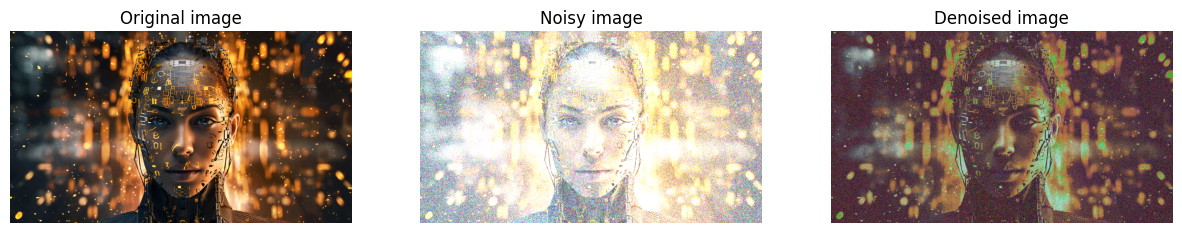

In [3]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Định nghĩa một lớp cho Phân Tích Thành Phần Chính (PCA)
class MyPCA:
    def __init__(self, n_components=None):
        self.n_components = n_components

    # Fit PCA vào dữ liệu đầu vào
    def fit(self, X):
        X = X.copy()
        # Tính toán trung bình và độ lệch chuẩn của dữ liệu
        self.mean = np.mean(X, axis=0)
        self.scale = np.std(X, axis=0)
        # Chuẩn hóa dữ liệu
        X_std = (X - self.mean) / self.scale

        # Tính ma trận hiệp phương sai và giá trị riêng / vector riêng
        cov_mat = np.cov(X_std.T)
        eig_vals, eig_vecs = np.linalg.eig(cov_mat)

        # Đảm bảo tính nhất quán của dấu của các vector riêng
        max_abs_idx = np.argmax(np.abs(eig_vecs), axis=0)
        signs = np.sign(eig_vecs[max_abs_idx, range(eig_vecs.shape[0])])
        eig_vecs = eig_vecs * signs[np.newaxis, :]
        eig_vecs = eig_vecs.T

        # Sắp xếp giá trị riêng và vector riêng
        eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[i, :]) for i in range(len(eig_vals))]
        eig_pairs.sort(key=lambda x: x[0], reverse=True)
        eig_vals_sorted = np.array([x[0] for x in eig_pairs])
        eig_vecs_sorted = np.array([x[1] for x in eig_pairs])

        # Chọn số lượng thành phần dựa trên tỷ lệ phương sai giải thích
        if self.n_components is None:
            explained_variance_ratio = eig_vals_sorted / np.sum(eig_vals_sorted)
            cum_explained_variance = np.cumsum(explained_variance_ratio)
            for idx, var in enumerate(cum_explained_variance):
                if var >= 0.98:  # Chọn số lượng thành phần chính để giải thích ít nhất 98% phương sai
                    self.n_components = idx + 1
                    break

        # Lưu trữ các thành phần chính đã chọn và tỷ lệ phương sai giải thích của chúng
        self.components = eig_vecs_sorted[:self.n_components, :]
        self.explained_variance_ratio = [i / np.sum(eig_vals) for i in eig_vals_sorted]
        self.cum_explained_variance = np.cumsum(self.explained_variance_ratio)

        return self

    # Chuyển đổi dữ liệu vào không gian thành phần chính
    def transform(self, X):
        X = X.copy()
        X_std = (X - self.mean) / self.scale
        X_proj = X_std.dot(self.components.T)
        return X_proj

    # Chuyển đổi dữ liệu từ không gian thành phần chính trở lại không gian ban đầu
    def inverse_transform(self, X_proj):
        X_proj = X_proj.copy()
        X_std = X_proj.dot(self.components)
        X_reconstructed = X_std * self.scale + self.mean
        return X_reconstructed

# Hàm thêm nhiễu Gauss vào ảnh
def add_noise(image, noise_level):
    noise = np.random.normal(0, noise_level, image.shape)
    noisy_image = image + noise
    noisy_image = np.clip(noisy_image, 0, 255)
    return noisy_image

# Hàm xử lý ảnh bằng cách sử dụng PCA để khử nhiễu
def process_image(image, pca, noise_level):
    image_array = np.array(image)
    # Thêm nhiễu Gauss vào ảnh
    noisy_image_array = add_noise(image_array, noise_level)
    # Áp dụng PCA để khử nhiễu ảnh
    denoised_image_array = pca.inverse_transform(pca.transform(noisy_image_array.reshape(-1, image_array.shape[-1]))).reshape(image_array.shape)
    # Chuyển đổi mảng ảnh khử nhiễu trở lại thành đối tượng Image
    denoised_image = Image.fromarray(denoised_image_array.astype(np.uint8))
    return denoised_image

# Đường dẫn đến ảnh gốc
image_path = '/content/drive/MyDrive/STUDY/PPSKHDL/Đồ án/Test1.jpg'

# Đọc ảnh gốc từ file
original_image = Image.open(image_path).convert('RGB')  # Chuyển đổi sang RGB cho ảnh màu
# In kích thước của ảnh gốc
print("Kích thước ảnh gốc:", original_image.size)

# Thiết lập mức độ nhiễu
noise_level = 50

# Số lượng thành phần chính cho PCA
n_components = None

# Chuyển đổi ảnh gốc thành mảng numpy
original_image_array = np.array(original_image)
# Reshape mảng numpy để mỗi pixel được biểu diễn bởi một vector
original_image_vector = original_image_array.reshape(-1, original_image_array.shape[-1])

# Khởi tạo và fit PCA
pca = MyPCA(n_components=n_components)
pca.fit(original_image_vector)

# Chuyển ảnh gốc thành ảnh nhiễu
noisy_image = add_noise(original_image_array, noise_level)
denoised_image_hand = process_image(original_image, pca, noise_level)

# Hiển thị ảnh gốc, ảnh nhiễu và ảnh đã được khử nhiễu
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title("Original image")
plt.imshow(original_image)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Noisy image")
plt.imshow(noisy_image)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Denoised image")
plt.imshow(denoised_image_hand)
plt.axis('off')

plt.show()


In [ ]:
print(or)

# PCA khi dùng thư viện sklearn

## Các bước chính của PCA trong sklearn

Hàm PCA (Principal Component Analysis - Phân tích Thành phần Chính) trong thư viện sklearn.decomposition của Python là một công cụ mạnh mẽ để giảm chiều dữ liệu và trích xuất các thành phần chính của dữ liệu. PCA giúp tối giản dữ liệu đa chiều thành một tập hợp ít chiều hơn mà vẫn giữ được những thông tin quan trọng nhất. Dưới đây là một giải thích chi tiết về cách sử dụng và hoạt động của hàm PCA trong sklearn.decomposition.

Khái niệm cơ bản về PCA
PCA là một phương pháp thống kê dùng để biến đổi một tập hợp các biến quan sát có tương quan với nhau thành một tập hợp các biến không tương quan được gọi là các thành phần chính (principal components). Các thành phần này sắp xếp theo thứ tự sao cho thành phần đầu tiên chứa phần lớn nhất của phương sai trong dữ liệu, thành phần thứ hai chứa phần lớn thứ hai của phương sai, và cứ tiếp tục như vậy.

***Các bước chính của thuật toán PCA trong sklearn:***
1. Chuẩn hóa dữ liệu (Standardize the Data):
*   Tính toán giá trị trung bình của mỗi đặc trưng (feature).
*   Trừ giá trị trung bình này khỏi dữ liệu để mỗi đặc trưng có giá trị trung bình là 0.
*   Nếu cần, dữ liệu có thể được chia cho độ lệch chuẩn để có phương sai là 1.
*   Mục danh sách
2. Tính toán ma trận hiệp phương sai (Compute the Covariance Matrix):
*   Ma trận hiệp phương sai mô tả mức độ mà hai biến thay đổi cùng nhau.
3. Tính toán giá trị riêng (Eigenvalues) và vector riêng (Eigenvectors) của ma trận hiệp phương sai:
*   Giá trị riêng và vector riêng được sử dụng để xác định hướng và độ lớn của các thành phần chính.
4. Sắp xếp giá trị riêng theo thứ tự giảm dần:
*   Các thành phần chính tương ứng với các giá trị riêng lớn nhất.
5. Chọn các thành phần chính:
*  Chọn n_components thành phần chính dựa trên giá trị riêng lớn nhất hoặc tỷ lệ phương sai được giải thích.
6. Biến đổi dữ liệu:
*   Sử dụng các vector riêng đã chọn để biến đổi dữ liệu vào không gian của các thành phần chính.

***Pseudocode của thuật toán PCA:***
1. Chuẩn hóa dữ liệu:

In [ ]:
X_centered = X - np.mean(X, axis=0)

2. Tính toán ma trận hiệp phương sai:

In [ ]:
covariance_matrix = np.cov(X_centered, rowvar=False)

3. Tính toán giá trị riêng và vector riêng:

In [ ]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

4. Sắp xếp giá trị riêng theo thứ tự giảm dần:

In [ ]:
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]


5. Chọn các thành phần chính:

In [ ]:
eigenvectors_subset = eigenvectors[:, :n_components]

6. Biến đổi dữ liệu

In [ ]:
X_reduced = np.dot(X_centered, eigenvectors_subset)

## Code

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


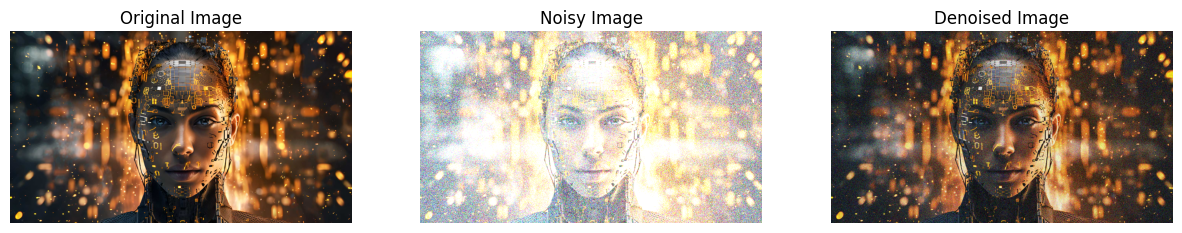

In [4]:
import numpy as np
from sklearn.decomposition import PCA
from PIL import Image
from google.colab import drive
import matplotlib.pyplot as plt

def generate_noise(size, mean=0, std=1):
    """
    Tạo ra nhiễu theo phân phối chuẩn.

    Parameters:
    size (int): Kích thước của nhiễu cần tạo.
    mean (float): Giá trị trung bình của phân phối chuẩn (mặc định là 0).
    std (float): Độ lệch chuẩn của phân phối chuẩn (mặc định là 1).

    Returns:
    ndarray: Mảng NumPy chứa nhiễu được tạo ra.
    """
    noise = np.random.normal(mean, std, size)
    return noise

def add_noise_to_image(image, noise_std):
    """
    Thêm nhiễu vào ảnh.

    Parameters:
    image (ndarray): Ảnh đầu vào.
    noise_std (float): Độ lệch chuẩn của phân phối chuẩn để tạo ra nhiễu.

    Returns:
    ndarray: Ảnh với nhiễu được thêm vào.
    """
    noise = generate_noise(image.shape, std=noise_std)
    noisy_image = np.clip(image + noise, 0, 255)
    return noisy_image

def pca_denoising(image, num_components):
    """
    Áp dụng PCA để khử nhiễu ảnh.

    Parameters:
    image (ndarray): Ảnh với nhiễu.
    num_components (int): Số lượng thành phần chính (principal components) được sử dụng.

    Returns:
    ndarray: Ảnh đã được khử nhiễu.
    """
    # Chuẩn hóa ảnh thành ma trận 2D
    pixels = image.reshape((-1, 3))

    # Áp dụng PCA
    pca = PCA(n_components=num_components)
    pixels_pca = pca.fit_transform(pixels)

    # Tạo lại ảnh từ các thành phần chính đã được giảm chiều
    denoised_pixels = pca.inverse_transform(pixels_pca)

    # Chuyển đổi lại thành kích thước ban đầu của ảnh
    denoised_image = denoised_pixels.reshape(image.shape).astype(np.uint8)

    return denoised_image

# Mount Google Drive
drive.mount('/content/drive')

# Đường dẫn đến ảnh trên Google Drive
image_path = '/content/drive/MyDrive/STUDY/PPSKHDL/Đồ án/Test1.jpg'

# Đọc ảnh
image = np.array(Image.open(image_path))

# Thêm nhiễu vào ảnh
noise_std = 50
noisy_image = add_noise_to_image(image, noise_std)

# Áp dụng PCA để khử nhiễu
denoised_image_lib = pca_denoising(noisy_image, num_components=0.98)

# Hiển thị ảnh gốc, ảnh có nhiễu và ảnh đã được khử nhiễu
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(noisy_image)
plt.title("Noisy Image")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(denoised_image_lib)
plt.title("Denoised Image")
plt.axis('off')

plt.show()

# Lưu ảnh sau khi xử lý

In [9]:
def save_image(image, output_path):
    """
    Lưu ảnh vào đường dẫn được chỉ định.

    Parameters:
    image (ndarray or Image): Ảnh để lưu. Có thể là mảng numpy (ndarray) hoặc đối tượng Image.
    output_path (str): Đường dẫn và tên file để lưu ảnh.

    Returns:
    None
    """
    # Chuyển đổi ảnh nếu là mảng numpy (ndarray)
    if isinstance(image, np.ndarray):
        image = Image.fromarray(image.astype(np.uint8))

    # Lưu ảnh
    image.save(output_path)


save_image(denoised_image_lib, '/content/drive/MyDrive/STUDY/PPSKHDL/Đồ án/lib_pca.jpg')
save_image(denoised_image_hand, '/content/drive/MyDrive/STUDY/PPSKHDL/Đồ án/hand_pca.jpg')

# Đánh giá kết quả

In [6]:
import numpy as np
from skimage.metrics import peak_signal_noise_ratio, structural_similarity
from PIL import Image

def evaluate_image_quality(image_path1, image_path2):
    """
    Đánh giá chất lượng ảnh bằng PSNR và SSIM.

    Parameters:
    image_path1 (str): Đường dẫn đến ảnh thứ nhất.
    image_path2 (str): Đường dẫn đến ảnh thứ hai.

    Returns:
    float, float: Giá trị PSNR và SSIM giữa hai ảnh.
    """
    # Đọc ảnh từ đường dẫn và chuyển đổi sang RGB
    image1 = Image.open(image_path1).convert('RGB')
    image2 = Image.open(image_path2).convert('RGB')

    # Chuyển đổi ảnh thành mảng numpy
    image_array1 = np.array(image1)
    image_array2 = np.array(image2)

    # Tính toán PSNR
    psnr_value = peak_signal_noise_ratio(image_array1, image_array2)

    # Tính toán SSIM
    ssim_value = structural_similarity(image_array1, image_array2, multichannel=True, channel_axis=-1)

    return psnr_value, ssim_value

# Đường dẫn đến ảnh gốc
original_image_path = '/content/drive/MyDrive/STUDY/PPSKHDL/Đồ án/Test1.jpg'

# Đường dẫn đến hai ảnh sau khi khôi phục bằng PCA từ thư viện và PCA tự implement
denoised_image_lib_path = '/content/drive/MyDrive/STUDY/PPSKHDL/Đồ án/lib_pca.jpg'
denoised_image_hand_path = '/content/drive/MyDrive/STUDY/PPSKHDL/Đồ án/hand_pca.jpg'

# Đánh giá chất lượng ảnh
psnr_lib, ssim_lib = evaluate_image_quality(denoised_image_lib_path, original_image_path)
psnr_hand, ssim_hand = evaluate_image_quality(denoised_image_hand_path, original_image_path)

# In kết quả đánh giá
print(f"PCA từ thư viện - PSNR: {psnr_lib}, SSIM: {ssim_lib}")
print(f"PCA tự implement - PSNR: {psnr_hand}, SSIM: {ssim_hand}")


<ipython-input-6-e7ef420f6c89>:28: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_value = structural_similarity(image_array1, image_array2, multichannel=True, channel_axis=-1)


PCA từ thư viện - PSNR: 18.005142430250675, SSIM: 0.19181740280730267
PCA tự implement - PSNR: 14.674018704043059, SSIM: 0.13849257375878443
